## Plot feature distribution over time

In [23]:
import pandas as pd

races_df = pd.read_csv("../data/races.csv")

races_df

,Unnamed: 0,date_time,race_id,n_runners,number,current_odds,current_place_odds,place,relevance,Current_Odds_Feature,...,Distance_Difference,Class_Difference,Has_Jockey_Changed,Purse,Average_Place_Lifetime,Average_Place_Track,Jockey_Weight,Max_Past_Rating,Weight_Allowance,Average_Place_Surface
0,0,2019-05-01 13:00:00,2855336,11,1,6.0,2.0,1,3,6.0,...,-5.0,0.0,1.0,4894.642857,6.303571,4.666667,62.1,70.0,0.0,6.290323
1,1,2019-05-01 13:00:00,2855336,11,2,9.0,2.6,4,0,9.0,...,-207.0,0.0,0.0,6862.500000,5.750000,NaN,60.3,55.0,0.0,NaN
2,2,2019-05-01 13:00:00,2855336,11,3,7.0,2.2,9,0,7.0,...,-408.0,0.0,0.0,12779.245283,5.396226,4.000000,59.4,74.0,0.0,4.166667
3,3,2019-05-01 13:00:00,2855336,11,4,5.5,1.9,2,2,5.5,...,-5.0,0.0,1.0,7028.571429,6.285714,4.333333,58.5,NaN,0.0,7.000000
4,4,2019-05-01 13:00:00,2855336,11,5,4.5,1.7,3,0,4.5,...,-207.0,0.0,0.0,6226.666667,5.866667,NaN,58.1,NaN,2.3,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299899,299899,2022-10-12 21:30:00,5430097,11,9,51.0,11.0,10,0,51.0,...,0.0,0.0,1.0,8450.000000,6.083333,9.000000,59.9,75.0,2.3,9.000000
299900,299900,2022-10-12 21:30:00,5430097,11,10,7.5,2.3,1,3,7.5,...,201.0,0.0,1.0,6384.615385,6.846154,9.666667,59.4,52.0,0.0,9.666667
299901,299901,2022-10-12 21:30:00,5430097,11,11,81.0,17.0,9,0,81.0,...,-201.0,0.0,0.0,7333.333333,7.833333,8.200000,59.0,NaN,2.3,7.833333
299902,299902,2022-10-12 21:30:00,5430097,11,12,15.0,3.8,5,1,15.0,...,201.0,0.0,1.0,7608.064516,5.483871,5.000000,59.0,51.0,1.4,4.972222


                  std
year-month           
2019-05     23.895126
2019-06     23.055939
2019-07     28.252695
2019-08     24.339095
2019-09     24.937857
2019-10     29.398386
2019-11     31.175244
2019-12     29.095223
2020-01     26.293374
2020-02     25.900129
2020-03     26.870024
2020-06     19.532602
2020-07     21.531134
2020-08     23.244989
2020-09     21.011049
2020-10     23.377088
2020-11     25.616027
2020-12     25.387218
2021-01     24.198204
2021-02     25.677200
2021-03     26.716740
2021-04     23.184224
2021-05     23.061070
2021-06     21.676580
2021-07     20.127031
2021-08     21.595188
2021-09     19.774606
2021-10     21.087998
2021-11     22.579457
2021-12     23.392195
2022-01     24.705920
2022-02     25.492820
2022-03     23.722611
2022-04     22.981406
2022-05     21.622519
2022-06     19.793871
2022-07     19.292537
2022-08     18.488095
2022-09     19.666101
2022-10     19.581114


<AxesSubplot:xlabel='Current_Speed_Figure', ylabel='year-month'>

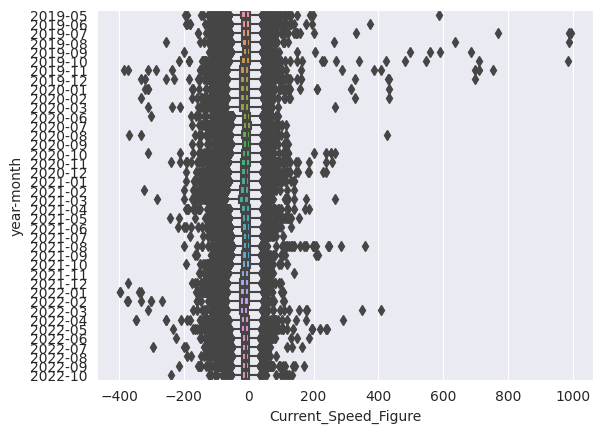

In [30]:
import seaborn as sns

COLUMN_NAME = "Current_Speed_Figure"
TIME_INTERVAL = "year-month"

races_df["year-month"] = races_df["date_time"].astype(str).str[:7]
races_df["date"] = pd.to_datetime(races_df["date_time"], format='%Y-%m-%d')
races_df["dayofweek"] = races_df["date"].dt.dayofweek.astype(str)
races_df["hour"] = races_df["date"].dt.hour.astype(str)
races_df["minute"] = races_df["date"].dt.minute.astype(str)
races_df["month"] = races_df["date"].dt.month.astype(str)

print(races_df.groupby([TIME_INTERVAL]).agg(std=(COLUMN_NAME, "std")))

sns.boxplot(data=races_df, x=COLUMN_NAME, y=TIME_INTERVAL)

# Covariate Shift Detection

## 1.) Between a month and its predecessor

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

races_df = pd.read_csv("../data/races.csv")
races_df["year-month"] = races_df["date_time"].astype(str).str[:7]

month_df = races_df[races_df["year-month"].isin(["2022-09", "2022-08"])]
month_df["label"] = np.where(month_df["year-month"] == "2022-09", 1, 0)

month_df = month_df.fillna(value=-1)

month_df = month_df.drop(["date_time", "race_id", "horse_id", "year-month", "Month_Sin", "Month_Cos", "Unnamed: 0"], axis=1)

print(month_df)

features = [column for column in month_df.columns if column not in ["label"]]
shift_X = month_df.loc[:, features]
scaler = StandardScaler().fit(shift_X)
shift_X = scaler.transform(shift_X)

shift_y = month_df.loc[:, "label"]

X_train, X_test, y_train, y_test = train_test_split(shift_X, shift_y, test_size=0.33, random_state=42, stratify=shift_y)

log_regression_classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
print(f"Classifier score:{log_regression_classifier.score(X_test, y_test)}")

coef_data = {
    "feature name": list([column for column in features]),
    "coeff": list(list(log_regression_classifier.coef_)[0]),
}

coeff_df = pd.DataFrame.from_dict(coef_data)
coeff_df.sort_values(by=["coeff"])

       n_runners  current_odds  current_place_odds  place  has_won  relevance  \
80410         11          4.20                1.64      6        0         27   
80411         11         67.00               14.20      9        0         25   
80412         11         15.00                3.80      3        0         30   
80413         11         41.00                9.00     11        0         17   
80414         11         12.00                3.20      4        0         29   
...          ...           ...                 ...    ...      ...        ...   
92525         10          3.75                1.55      4        0         26   
92526         10         11.00                3.00      9        0         22   
92527         10         12.00                3.20      5        0         25   
92528         10         10.00                2.80      1        1         30   
92529         10         17.00                4.20      3        0         29   

       Current_Odds_Feature

/tmp/ipykernel_8287/2015652303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df["label"] = np.where(month_df["year-month"] == "2022-09", 1, 0)


,feature name,coeff
12,Draw_Bias,-0.377124
10,Age,-0.294436
1,current_odds,-0.280174
6,Current_Odds_Feature,-0.280174
11,Current_Rating,-0.240611
18,Hour_Cos,-0.177859
8,Current_Race_Class,-0.164490
14,Current_Race_Track,-0.159514
48,Average_Place_Surface,-0.119077
45,Jockey_Weight,-0.095458
